In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/kaggle/input/covid19-vaccines-list-countrywise/Covid 19 Vaccines Location.csv')
data.head()

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Afghanistan,AFG,"CanSino, Covaxin, Johnson&Johnson, Moderna, Ox...",2023-01-16,World Health Organization,https://covid19.who.int/
1,Albania,ALB,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",2023-01-08,World Health Organization,https://covid19.who.int/
2,Algeria,DZA,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",2022-09-04,World Health Organization,https://covid19.who.int/
3,Andorra,AND,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2022-12-18,World Health Organization,https://covid19.who.int/
4,Angola,AGO,Oxford/AstraZeneca,2023-01-01,World Health Organization,https://covid19.who.int/


In [3]:
data['last_observation_date'] = pd.to_datetime(data['last_observation_date'])

In [4]:
vac = data['vaccines'].copy()
vac= pd.DataFrame(vac.str.split(',',expand=True))
vac = pd.get_dummies(vac)

vac.columns = vac.columns.str.replace('_','')

import re
col=[]
for i in vac.columns:
    res, n = re.subn('[0-9]', '',i)
    col.append(res)
vac.columns = col
vac.columns = vac.columns.str.strip()
vac=vac.groupby(lambda x:x, axis=1).sum()

data= pd.concat([data,vac],axis=1)

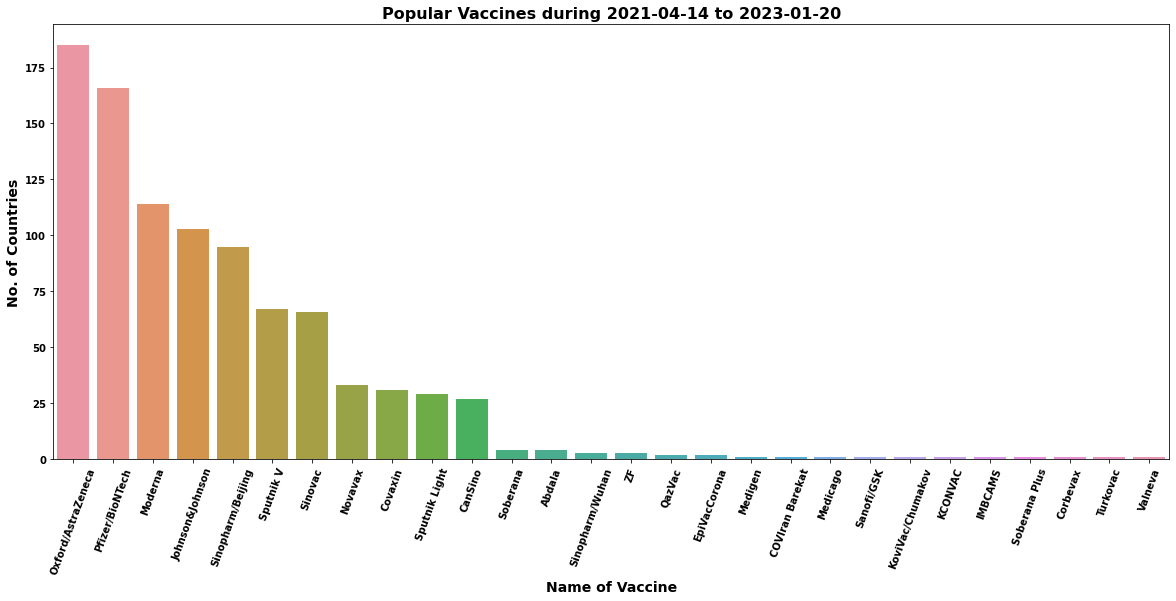

In [5]:
pop_vac = pd.DataFrame(data.groupby(data['location']).sum().T)
pop_vac.columns.name = None
pop_vac.reset_index(inplace=True)
pop_vac.rename(columns={'index':'vaccines'},inplace=True)
pop_vac['total'] = pop_vac.sum(axis=1,numeric_only=True)

plt.figure(figsize=(20,8))
sns.barplot(x='vaccines',y='total',data=pop_vac,order=pop_vac.sort_values('total',ascending = False).vaccines)

plt.xticks(rotation=70,weight='bold')
plt.yticks(weight='bold')
plt.title('Popular Vaccines during 2021-04-14 to 2023-01-20',weight='bold',fontsize=16)
plt.xlabel('Name of Vaccine',weight='bold',fontsize=14)
plt.ylabel('No. of Countries',weight='bold',fontsize=14)

None

In [6]:
no_of_vac = pd.DataFrame(data.groupby(data['location']).sum())
no_of_vac.columns.name = None
no_of_vac.reset_index(inplace=True)
no_of_vac.rename(columns={'location':'country'},inplace=True)
no_of_vac['total'] = no_of_vac.sum(axis=1,numeric_only=True)

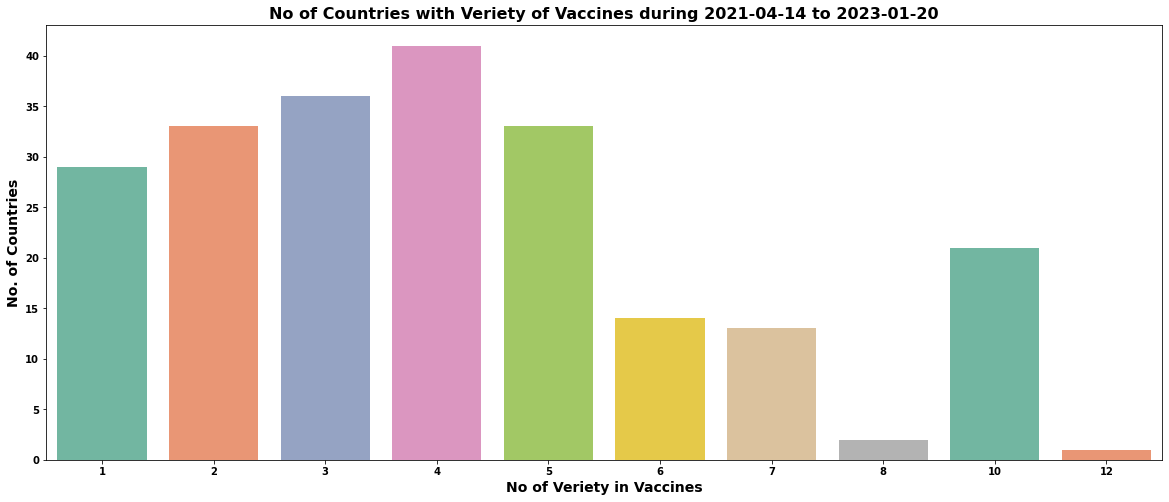

In [7]:
type_of_vac=pd.DataFrame(no_of_vac['total'].value_counts()).reset_index()
type_of_vac.rename(columns={'index':'type_of_vac'},inplace=True)

plt.figure(figsize=(20,8))
sns.barplot(x='type_of_vac',y='total',data=type_of_vac,order=type_of_vac.sort_values('type_of_vac').type_of_vac,palette='Set2')

plt.title('No of Countries with Veriety of Vaccines during 2021-04-14 to 2023-01-20',weight='bold',fontsize=16)
plt.xlabel('No of Veriety in Vaccines',weight='bold',fontsize=14)
plt.ylabel('No. of Countries',weight='bold',fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
None

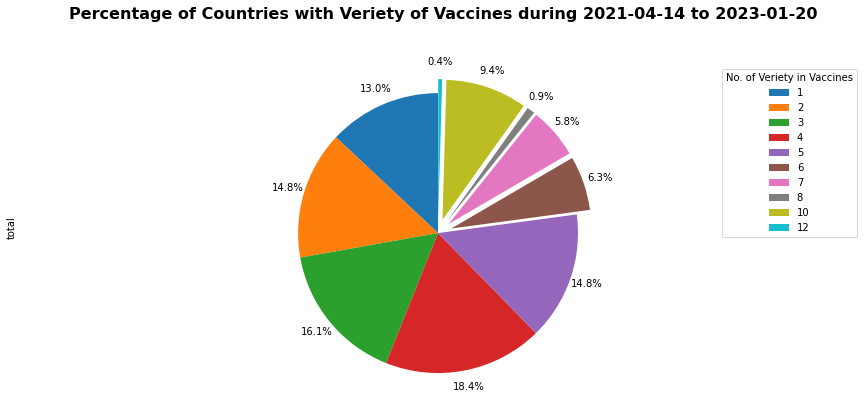

In [8]:
explode_list = [0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1]
type_of_vac.sort_values('type_of_vac')['total'].plot(kind='pie',
                          figsize=(15, 6),startangle=90,
                          autopct='%1.1f%%',
                          shadow=False,
                          labels=None,
                          pctdistance=1.12,
                          explode=explode_list
                         )
plt.title('Percentage of Countries with Veriety of Vaccines during 2021-04-14 to 2023-01-20',y=1.12,weight='bold',fontsize=16)
plt.axis('equal')
plt.legend(labels=type_of_vac.sort_values('type_of_vac').type_of_vac,loc='upper right',title='No. of Veriety in Vaccines')
plt.show()

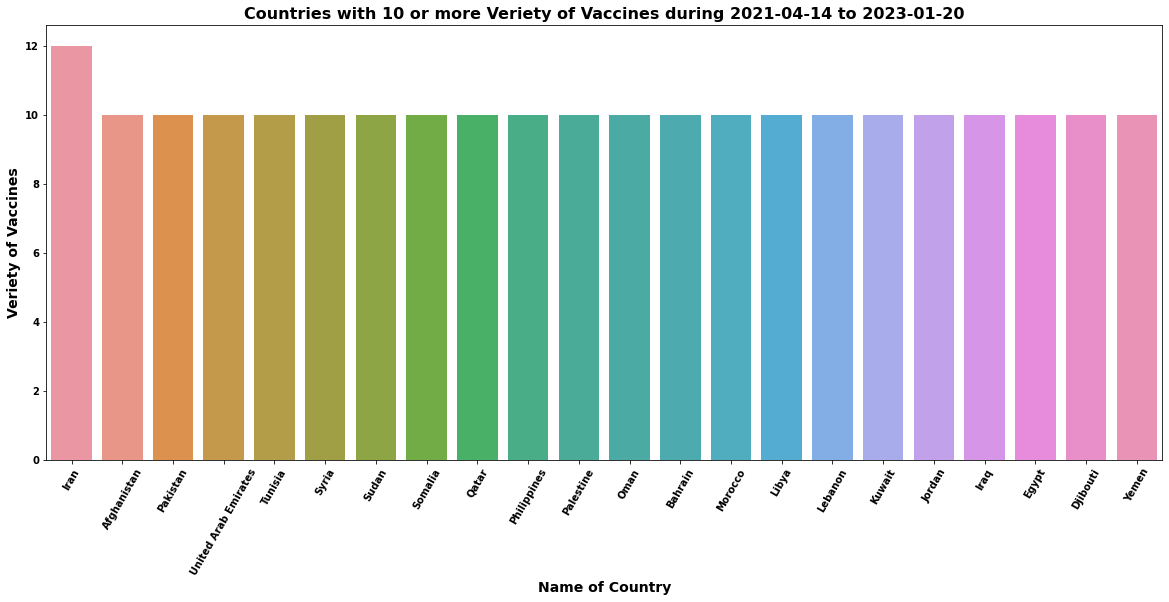

In [9]:
max_no_vac=no_of_vac[no_of_vac['total']>=10]

plt.figure(figsize=(20,8))
sns.barplot(x='country',y='total',data=max_no_vac,
            order=max_no_vac.sort_values('total',ascending=False).country)

plt.title('Countries with 10 or more Veriety of Vaccines during 2021-04-14 to 2023-01-20',weight='bold',fontsize=16)
plt.xlabel('Name of Country',weight='bold',fontsize=14)
plt.xticks(rotation=60,weight='bold')
plt.yticks(weight='bold')
plt.ylabel('Veriety of Vaccines',weight='bold',fontsize=14)
None